Copyright (C) 2024  Adam Jones  All Rights Reserved

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import figure_standard
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
n_boot = 10001
figure_standard.standardize_plot_settings()
main_palette = figure_standard.create_main_palette()

In [3]:
### a
# load data
df_gaussian = pd.read_excel("../2_intermediate_data/robust_noise_gaussian.xlsx")
df_em = pd.read_excel("../2_intermediate_data/robust_noise_em.xlsx")
df_bw = pd.read_excel("../2_intermediate_data/robust_noise_bw.xlsx")
df_ma = pd.read_excel("../2_intermediate_data/robust_noise_ma.xlsx")

data_gaussian = pd.melt(df_gaussian, id_vars=['percent'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))
data_em = pd.melt(df_em, id_vars=['percent'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))
data_bw = pd.melt(df_bw, id_vars=['percent'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))
data_ma = pd.melt(df_ma, id_vars=['percent'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))


# scale up
data_gaussian['percent'] = 100 * data_gaussian.percent 
data_em['percent'] = 100 * data_em.percent 
data_bw['percent'] = 100 * data_bw.percent 
data_ma['percent'] = 100 * data_ma.percent 

# label
data_gaussian['type'] = 'Gaussian'
data_em['type'] = 'electrode movement'
data_bw['type'] = 'baseline wander'
data_ma['type'] = 'movement artifact'

# create a baseline dataset
data_baseline = data_gaussian.copy(deep=True)
data_baseline['type'] = 'baseline'

for percent in list(data_baseline.percent.unique()):
    if percent > 0:
        data_baseline.loc[data_baseline.percent == percent, 'value'] = data_baseline.loc[data_baseline.percent == 0, 'value'].values

data_baseline['value'] = -data_baseline['value']

data_noise_all = pd.concat([data_baseline, data_gaussian, data_bw, data_em, data_ma])

In [4]:
### b
df_trim_beg = pd.read_excel('../2_intermediate_data/robust_trim_beg.xlsx')
data_trim_beg = pd.melt(df_trim_beg, id_vars=['epochs_removed'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))
data_trim_beg['time_hr'] = data_trim_beg['epochs_removed'] * 30 / 3600

In [5]:
### c
# load model data
model_df = pd.read_excel("../2_intermediate_data/main_model_data.xlsx")

# rename the stages
model_df = model_df.rename(columns={"o_kappa": "All","w_kappa": "Wake","n1_kappa": "N1","n2_kappa": "N2","n3_kappa": "N3","rem_kappa": "REM"})

# keep only the relevant columns
model_df = model_df.loc[model_df['set']==3, ['All', 'Wake', 'N1', 'N2', 'N3', 'REM']].copy(deep=True)

flip_df =pd.read_excel("../2_intermediate_data/robust_epochs_flip.xlsx")
shuffle_df =pd.read_excel("../2_intermediate_data/robust_epochs_shuffle.xlsx")

model_data = pd.melt(model_df, id_vars=None, value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])
flip_data = pd.melt(flip_df, id_vars=None, value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])
shuffle_data = pd.melt(shuffle_df, id_vars=None, value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])


model_data['collection'] = 'normal'
flip_data['collection'] = 'reversed'
shuffle_data['collection'] = 'shuffled'

data_epoch_order = pd.concat([model_data, flip_data, shuffle_data])

data_epoch_order['dummy'] = 'Overall'

In [6]:
### d
# load data
df_non = pd.read_excel("../2_intermediate_data/robust_zeroed_non.xlsx")
df_zero = pd.read_excel("../2_intermediate_data/robust_zeroed.xlsx")

df_non['type'] = 'normal epochs'
df_zero['type'] = 'silenced epochs'

df_dupe = pd.DataFrame(columns=df_non.columns)
df_dupe.loc[0] = [0, 0, 0, 0, 0, 0, 0, 'fake']

df_all_silence = pd.concat([df_dupe, df_non, df_zero])
df_all_silence = pd.melt(df_all_silence, id_vars=['type', 'percent'], value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])
df_all_silence['percent'] = df_all_silence['percent'] * 100

In [7]:
### e
df_trim_end = pd.read_excel('../2_intermediate_data/robust_trim_end.xlsx')
data_trim_end = pd.melt(df_trim_end, id_vars=['epochs_removed'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))

data_trim_end['time_hr'] = data_trim_end['epochs_removed'] * 30 / 3600

In [8]:
### f
flip_sex_df =pd.read_excel("../2_intermediate_data/robust_sex_flip.xlsx")
random_age_df =pd.read_excel("../2_intermediate_data/robust_random_age.xlsx")

flip_sex_data = pd.melt(flip_sex_df, id_vars=None, value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])
random_age_data = pd.melt(random_age_df, id_vars=None, value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])

flip_sex_data['collection'] = 'flip sex'
random_age_data['collection'] = 'random age'

data_demographics = pd.concat([model_data, flip_sex_data, random_age_data])

data_demographics['dummy'] = 'Overall'

1 extra bytes in post.stringData array
fdsc NOT subset; don't know how to subset; dropped
fond NOT subset; don't know how to subset; dropped
just NOT subset; don't know how to subset; dropped


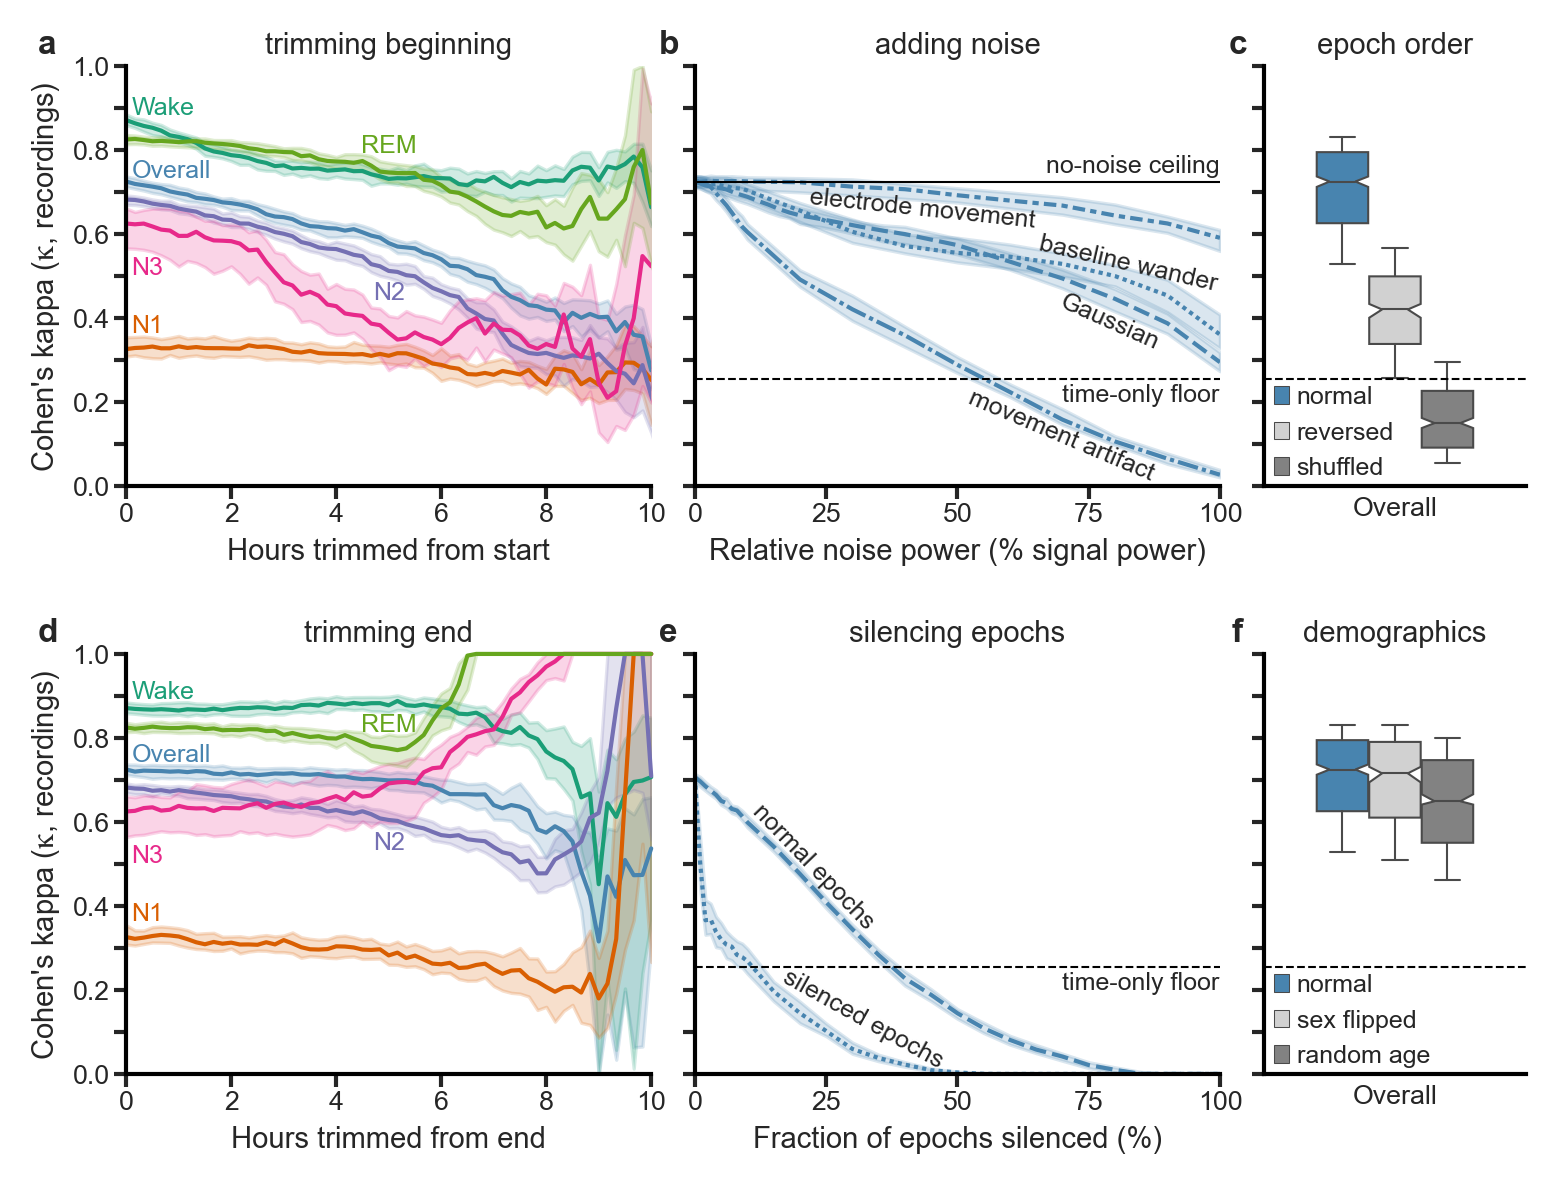

In [9]:
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.5])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1], sharey=ax1)
ax3 = plt.subplot(gs[0, 2], sharey=ax1)
ax4 = plt.subplot(gs[1, 0])
ax5 = plt.subplot(gs[1, 1], sharey=ax4)
ax6 = plt.subplot(gs[1, 2], sharey=ax4)


### a

sns.lineplot(data=data_trim_beg, x="time_hr", 
             y="value", 
             linewidth=1,
             n_boot=n_boot,
             estimator='median',
             palette = main_palette,
             clip_on=True,
             ax=ax1,
             hue="variable")

ax1.set_xlim((0, 10))
ax1.set_ylim((0, 1))
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

for label in ax1.get_yticklabels()[1::2]:
    label.set_visible(False)

ax1.legend().remove()

ax1.text(0.01, 0.75, "Overall", transform=ax1.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[0])

ax1.text(0.01, 0.90, "Wake", transform=ax1.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[1])

ax1.text(0.01, 0.38, "N1", transform=ax1.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[2])

ax1.text(0.50, 0.46, "N2", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[3])

ax1.text(0.01, 0.52, "N3", transform=ax1.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[4])

ax1.text(0.50, 0.81, "REM", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[5])


sns.despine(ax=ax1, right=True, top=True, bottom=False)
ax1.grid(False)
ax1.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax1.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

labelpad = 2.5
ax1.set_xlabel('Hours trimmed from start', fontweight=None, labelpad=labelpad)
ax1.set_ylabel('Cohen\'s kappa ($\kappa$, recordings)', fontweight=None, labelpad=labelpad)




### b 

sns.lineplot(
    data=data_noise_all[data_noise_all.variable == 'All'],
    x="percent", y="value",
    hue="type",
    estimator='median',
    n_boot=n_boot,
    palette=[main_palette[0]]*5,
    linewidth=1,
    markers=False,
    style="type",
    ax=ax2
)


labelpad = 2.5
ax2.set_xlabel('Relative noise power (% signal power)', fontweight=None, labelpad=labelpad)
ax2.set_ylabel('')

ax2.set_ylim([0, 1])
ax2.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
for label in ax2.get_yticklabels():
    label.set_visible(False)

ax2.set_xlim((0, 100))

ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax2.legend().remove()

no_ecg_baseline = 0.253529024384562
min_color = 'black'
min_width = 0.5
line_style = '--'
ax2.axhline(no_ecg_baseline, color=min_color, xmin=0, xmax=1, linewidth=min_width, linestyle=line_style)
ax2.text(0.999, no_ecg_baseline - 0.01, "time-only floor", transform=ax2.transAxes,
      fontsize=6, va='top', ha='right')

full_median = 0.724756
ax2.axhline(full_median, color=min_color, xmin=0, xmax=1, linewidth=min_width, linestyle='-')
ax2.text(0.999, full_median + 0.01, 'no-noise ceiling', transform=ax2.transAxes,
      fontsize=6, va='bottom', ha='right')

ax2.text(0.65, 0.66, 'electrode movement', transform=ax2.transAxes,
      fontsize=6, va='center', ha='right').set_rotation(-6)

ax2.text(0.999, 0.53, 'baseline wander', transform=ax2.transAxes,
      fontsize=6, va='center', ha='right').set_rotation(-13)

ax2.text(0.89, 0.39, "Gaussian", transform=ax2.transAxes,
      fontsize=6, va='center', ha='right').set_rotation(-24)

ax2.text(0.88, 0.12, 'movement artifact', transform=ax2.transAxes,
      fontsize=6, va='center', ha='right').set_rotation(-23)


sns.despine(ax=ax2, right=True, top=True)
ax2.grid(False)
ax2.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax2.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)



### c

order_palette = []
order_palette += [main_palette[0]]
order_palette += [sns.color_palette("Greys", 6)[1]]
order_palette += [sns.color_palette("Greys", 6)[3]]

sns.boxplot(
    data=data_epoch_order[data_epoch_order.variable == 'All'],
    x="dummy",
    y="value",
    hue="collection", 
    palette=order_palette,
    whis=[10, 90], showfliers=False, linewidth=0.5,
    notch=True, bootstrap=n_boot,
    width=0.6,
    saturation=1,
    ax=ax3
)


for label in ax3.get_yticklabels():
    label.set_visible(False)

handles, labels = ax3.get_legend_handles_labels()
labels = ['normal', 'reversed', 'shuffled']
ax3.legend(handles=handles, labels=labels, framealpha=1, 
          title='',
          title_fontproperties={'weight':None, 'size': 6},
      #     loc='upper right',
            loc=(0.04, 0.015),
          alignment='left',
          fontsize=6, ncol=1,
          borderpad=0,
          handlelength=0.6,
          handletextpad=0.3,
          columnspacing=1)

ax3.axhline(no_ecg_baseline, color=min_color, xmin=0, xmax=1, linewidth=min_width, linestyle=line_style)

sns.despine(ax=ax3, right=True, top=True, bottom=False)
ax3.grid(False)
ax3.tick_params(axis='y', left=True, width=1, length=3, pad=1)

# move the labels closer to the axis
for tick in ax3.get_xticklabels():
    tick.set_verticalalignment("bottom")

labelpad = 2.5
ax3.set_xlabel('', fontweight=None, labelpad=labelpad)
ax3.set_ylabel('')



### d

sns.lineplot(data=data_trim_end[data_trim_end.time_hr <= 10], x="time_hr", 
             y="value", 
             linewidth=1,
             n_boot=n_boot,
             estimator='median',
             palette = main_palette,
            ax=ax4,
            clip_on=False,
             hue="variable")

ax4.set_xlim((0, 10))
ax4.xaxis.set_major_locator(plt.MaxNLocator(5))

ax4.set_ylim([0, 1])
ax4.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
for label in ax4.get_yticklabels()[1::2]:
    label.set_visible(False)


ax4.legend().remove()

ax4.text(0.01, 0.76, "Overall", transform=ax4.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[0])

ax4.text(0.01, 0.91, "Wake", transform=ax4.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[1])

ax4.text(0.01, 0.38, "N1", transform=ax4.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[2])

ax4.text(0.50, 0.55, "N2", transform=ax4.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[3])

ax4.text(0.01, 0.52, "N3", transform=ax4.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[4])

ax4.text(0.50, 0.83, "REM", transform=ax4.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[5])


sns.despine(ax=ax4, right=True, top=True, bottom=False)
ax4.grid(False)
ax4.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax4.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

labelpad = 2.5
ax4.set_xlabel('Hours trimmed from end', fontweight=None, labelpad=labelpad)
ax4.set_ylabel('Cohen\'s kappa ($\kappa$, recordings)', fontweight=None, labelpad=labelpad)



### e

sns.lineplot(data=df_all_silence,
            x="percent", y="value",
            hue="type",
            linewidth=1,
            estimator='median',
            n_boot=n_boot,
            palette=[main_palette[0]]*3,
            markers=False,
            style="type",
            ax=ax5,
)

ax5.set_xlim((0, 100))

ax5.xaxis.set_major_locator(plt.MaxNLocator(4))
for label in ax5.get_yticklabels():
    label.set_visible(False)


ax5.legend().remove()

no_ecg_baseline = 0.253529024384562
min_color = 'black'
min_width = 0.5
line_style = '--'
ax5.axhline(no_ecg_baseline, color=min_color, xmin=0, xmax=1, linewidth=min_width, linestyle=line_style)
ax5.text(0.999, no_ecg_baseline - 0.01, "time-only floor", transform=ax5.transAxes,
      fontsize=6, va='top', ha='right')


ax5.text(0.225, 0.495, 'normal epochs', transform=ax5.transAxes,
      fontsize=6, va='center', ha='center').set_rotation(-46)

ax5.text(0.32, 0.13, 'silenced epochs', transform=ax5.transAxes,
      fontsize=6, va='center', ha='center').set_rotation(-29)

sns.despine(ax=ax5, right=True, top=True, bottom=False)
ax5.grid(False)
ax5.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax5.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

labelpad = 2.5
ax5.set_xlabel('Fraction of epochs silenced (%)', fontweight=None, labelpad=labelpad)
ax5.set_ylabel('')



### f

sns.boxplot(
    data=data_demographics[data_demographics.variable == 'All'],
    x="dummy",
    y="value",
    hue="collection", 
    palette=order_palette,
    whis=[10, 90], showfliers=False, linewidth=0.5,
    notch=True, bootstrap=n_boot,
    width=0.6,
    saturation=1,
    ax=ax6
)

ax6.axhline(no_ecg_baseline, color=min_color, xmin=0, xmax=1, linewidth=min_width, linestyle=line_style)

for label in ax6.get_yticklabels():
    label.set_visible(False)

handles, labels = ax6.get_legend_handles_labels()
labels = ['normal', 'sex flipped', 'random age']
ax6.legend(handles=handles, labels=labels, framealpha=1, 
          title='',
          title_fontproperties={'weight':None, 'size': 6},
          loc=(0.04, 0.015),
          alignment='left',
          fontsize=6, ncol=1,
          borderpad=0,
          handlelength=0.6,
          handletextpad=0.3,
          columnspacing=1)

sns.despine(ax=ax6, right=True, top=True, bottom=False)
ax6.grid(False)
ax6.tick_params(axis='y', left=True, width=1, length=3, pad=1)

# move the labels closer to the axis
for tick in ax6.get_xticklabels():
    tick.set_verticalalignment("bottom")

labelpad = 2.5
ax6.set_xlabel('', fontweight=None, labelpad=labelpad)
ax6.set_ylabel('')





### panel labels
panel_label_y = 1.05
panel_label_x = -0.75
panel_label_x_noaxislabel = -0.25
panel_fontsize = 8

ax1.text(panel_label_x/5, panel_label_y, 'a', transform=ax1.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax2.text(panel_label_x_noaxislabel/5, panel_label_y, 'b', transform=ax2.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax3.text(panel_label_x_noaxislabel/2.5, panel_label_y, 'c', transform=ax3.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax4.text(panel_label_x/5, panel_label_y, 'd', transform=ax4.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax5.text(panel_label_x_noaxislabel/5, panel_label_y, 'e', transform=ax5.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax6.text(panel_label_x_noaxislabel/2.5, panel_label_y, 'f', transform=ax6.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')

panel_title_x = 0.5
title_fontsize = 7
ax1.text(panel_title_x, panel_label_y, 'trimming beginning', transform=ax1.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax2.text(panel_title_x, panel_label_y, 'adding noise', transform=ax2.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax3.text(panel_title_x, panel_label_y, 'epoch order', transform=ax3.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax4.text(panel_title_x, panel_label_y, 'trimming end', transform=ax4.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax5.text(panel_title_x, panel_label_y, 'silencing epochs', transform=ax5.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax6.text(panel_title_x, panel_label_y, 'demographics', transform=ax6.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')


plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.1)
figure_standard.scale_figure_by_axes(ax1, 1.4, 1.75)


# save the figure
filename = os.path.basename(globals()["__vsc_ipynb_file__"]).replace(".ipynb", "")
figure_standard.save_figure_files(filename)